

# Project: Food Production & Supply in Africa

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information on food production and consumption(supply) in Africa obtained from the Food and Agriculture Organization (FAO).

Two datasets were used in this project namely;

1.  Africa Food Production
This dataset includes the following features 

- Country - 45 Distinct African Countries

- Items - Food items produced

- Year - Year ranging from 2004 - 2013

- Value - Value of food item produced for each year

2. Africa Food Supply

The second dataset consists of the following features

- Country - 45 Distinct African Countries

- Year - Year ranging from 2004 - 2013

- Value - Value of food item supplied for each year


*Importing the neccessary libraries to investigate the dataset.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

Loading the first dataset

In [2]:
df1 = pd.read_csv('Africa Food Production (2004 - 2013).csv')

In [3]:
df1.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
df1.shape

(23110, 4)

The first dataset which is the Africa Food Production dataset consists of 23110 rows and 4 columns.

In [5]:
df1.sample(10)

,Country,Item,Year,Value
17598,Sierra Leone,Bovine Meat,2012,11
13863,Morocco,Crustaceans,2007,12
12035,Mali,Cottonseed Oil,2009,18
17078,Senegal,Mutton & Goat Meat,2012,44
22965,Zimbabwe,"Beverages, Alcoholic",2009,50
19277,Swaziland,Grapefruit and products,2011,37
12319,Mauritania,Barley and products,2013,1
21688,United Republic of Tanzania,Coffee and products,2012,66
21476,United Republic of Tanzania,"Oilcrops, Other",2010,59
9308,Kenya,Sorghum and products,2012,167


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [7]:
df1.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [8]:
sum(df1.duplicated())

0

#### There are no missing values and no duplicates in the production dataset.

In [9]:
df1.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [10]:
type(df1['Year'][0])

numpy.int64

- Change the year from int64 to DateObjects
- Add units to Value to make them Quantities

In [11]:
df1.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [12]:
df1.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


#### Define

Change Year from int to DateTime.

In [13]:
df1.Year

0        2004
1        2005
2        2006
3        2007
4        2008
         ... 
23105    2009
23106    2010
23107    2011
23108    2012
23109    2013
Name: Year, Length: 23110, dtype: int64

#### Code

In [14]:
df1.Year.astype('int32')

0        2004
1        2005
2        2006
3        2007
4        2008
         ... 
23105    2009
23106    2010
23107    2011
23108    2012
23109    2013
Name: Year, Length: 23110, dtype: int32

In [15]:
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')

#### Test

In [16]:
df1.Year

0       2004-01-01
1       2005-01-01
2       2006-01-01
3       2007-01-01
4       2008-01-01
           ...    
23105   2009-01-01
23106   2010-01-01
23107   2011-01-01
23108   2012-01-01
23109   2013-01-01
Name: Year, Length: 23110, dtype: datetime64[ns]

#### Adding Units to Values to make them Quantities

In [17]:
#df1.Value = [str(value)+' kt' for value in df1.Value]

##### Adding "kt" to the `value` column turns the said column to a string hence aggregate functions like sum() wouldn't work. I had to remove the"kt".

In [18]:
df1.groupby(['Country','Year','Item']).sum()

Value
Country  Year       Item                        
Algeria  2004-01-01 Apples and products      165
                    Bananas                    0
                    Barley and products     1212
                    Beans                      2
                    Beer                     110
...                                          ...
Zimbabwe 2013-01-01 Tea (including mate)      19
                    Tomatoes and products     24
                    Vegetables, Other        203
                    Wheat and products        25
                    Wine                       2

[23110 rows x 1 columns]

In [19]:
total_production_value=  df1.groupby(['Country','Year']).sum()

In [20]:
total_production_value

Value
Country  Year             
Algeria  2004-01-01  15536
         2005-01-01  15667
         2006-01-01  16417
         2007-01-01  14763
         2008-01-01  13841
...                    ...
Zimbabwe 2009-01-01   5754
         2010-01-01   6777
         2011-01-01   7551
         2012-01-01   8173
         2013-01-01   7914

[450 rows x 1 columns]

I want this code so the title can be bold



plt.title('Food suppliers trend',{'fontsize': 20,'fontweight' :'bold'})

### Visualizations for the production dataset

### 1. What Year had the highest food production value ?

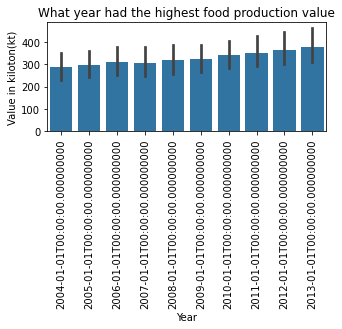

In [21]:
plt.figure(figsize=(5,2))
color = sns.color_palette()[0]
sns.barplot(data = df1, x='Year', y= 'Value',color=color)
plt.title('What year had the highest food production value')
plt.ylabel('Value in kiloton(kt)')
plt.xticks(rotation=90)
plt.show()

In [22]:
df1.Year.value_counts()

2004-01-01    2312
2005-01-01    2312
2006-01-01    2312
2007-01-01    2312
2008-01-01    2312
2009-01-01    2312
2010-01-01    2312
2011-01-01    2312
2012-01-01    2307
2013-01-01    2307
Name: Year, dtype: int64

### 2. Top 3 Food Producing Countries in Africa

In [23]:
order = df1.groupby(["Country"])["Value"].sum().sort_values(ascending=False)[0:21].index
order

Index(['Nigeria', 'Egypt', 'South Africa', 'Ethiopia',
       'United Republic of Tanzania', 'Sudan', 'Ghana', 'Uganda', 'Morocco',
       'Kenya', 'Cameroon', 'Angola', 'Algeria', 'Cote d'Ivoire', 'Mozambique',
       'Malawi', 'Madagascar', 'Burkina Faso', 'Rwanda', 'Tunisia', 'Mali'],
      dtype='object', name='Country')

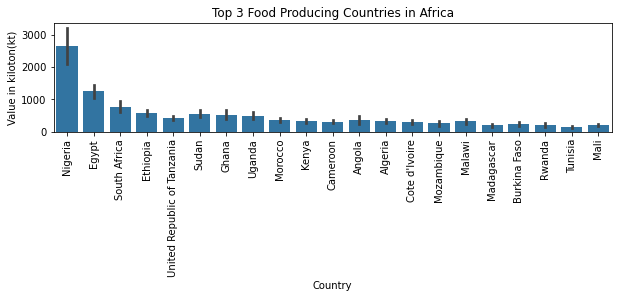

In [24]:
plt.figure(figsize=(10,2))
color = sns.color_palette()[0]
sns.barplot(data = df1, x='Country', y= 'Value',color=color, order=order)
plt.title('Top 3 Food Producing Countries in Africa')
plt.ylabel('Value in kiloton(kt)')
plt.xticks(rotation=90)
plt.show()

The visualization above shows that
**Nigeria, Egypt and South Africa are the top three food producing countries in Africa between 2004 and 2013.**

### 3. Top 5 Food Items Produced in Africa

In [25]:
df1.Item.value_counts()

Milk - Excluding Butter         450
Vegetables, Other               450
Mutton & Goat Meat              450
Bovine Meat                     450
Offals, Edible                  450
                               ... 
Olive Oil                        40
Olives (including preserved)     40
Rape and Mustard Oil             40
Rye and products                 30
Cloves                           30
Name: Item, Length: 94, dtype: int64

In [26]:
item_order = df1.Item.value_counts().index[:51]

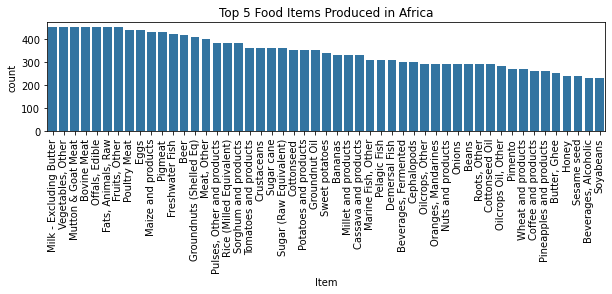

In [27]:
color = sns.color_palette()[0]
plt.figure(figsize=(10,2))
sns.countplot(data=df1, x='Item',color = color, order = item_order)
plt.title('Top 5 Food Items Produced in Africa')

plt.xticks(rotation=90)
plt.show()

The bar chart above shows that **Milk(excluding butter),Vegetables,Mutton & Goat Meat,Bovine Meat,Offals(edible),Fats,Animals,Raw and Fruits are the top produced foods in Africa with a count of 450 each.**

Loading the second dataset.

In [28]:
df2 = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [29]:
df2.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [30]:
df2.sample(10)

,Country,Year,Value
52,Cabo Verde,2006,2513
210,Liberia,2004,2092
75,Central African Republic,2009,2139
20,Benin,2004,2461
370,Sudan,2012,2301
1,Algeria,2005,2958
339,Sao Tome and Principe,2013,2400
320,Rwanda,2004,1969
284,Mozambique,2008,2164
321,Rwanda,2005,2037


In [31]:
df2.shape

(450, 3)

The second dataset which is the Africa Food Supply dataset consists of 450 rows and 3 columns.

In [32]:
df2.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [34]:
df2.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [35]:
sum(df2.duplicated())

0

#### There are no missing values and no duplicates in the supply dataset.

In [36]:
df2.dtypes

Country    object
Year        int64
Value       int64
dtype: object

In [37]:
type(df2['Year'][0])

numpy.int64

- Change the year from int64 to DateObjects
- Add units to Value to make them Quantities

#### Define

Change Year from int to DateTime.

In [38]:
df2.Year

0      2004
1      2005
2      2006
3      2007
4      2008
       ... 
445    2009
446    2010
447    2011
448    2012
449    2013
Name: Year, Length: 450, dtype: int64

#### Code

In [39]:
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')

#### Test

In [40]:
df2.Year

0     2004-01-01
1     2005-01-01
2     2006-01-01
3     2007-01-01
4     2008-01-01
         ...    
445   2009-01-01
446   2010-01-01
447   2011-01-01
448   2012-01-01
449   2013-01-01
Name: Year, Length: 450, dtype: datetime64[ns]

#### Define

Add units to `Value` (kcal/person/day).

#### Code

In [41]:
#df2.Value = [str(value)+' (kcal/person/day)' for value in df2.Value]

#### Test

In [42]:
df2.Value

0      2987
1      2958
2      3047
3      3041
4      3048
       ... 
445    2147
446    2168
447    2200
448    2197
449    2110
Name: Value, Length: 450, dtype: int64

In [43]:
type(df2['Value'][0])

numpy.int64

##### Adding "(kcal/person/day)" to the `value` column turns the said column to a string hence aggregate functions like sum() wouldn't work. I had to remove the"(kcal/person/day)".

Grouping the dataset by Countries.

In [44]:
total_supply_value=df2.groupby(['Country','Year']).sum()

In [45]:
total_supply_value

Value
Country  Year             
Algeria  2004-01-01   2987
         2005-01-01   2958
         2006-01-01   3047
         2007-01-01   3041
         2008-01-01   3048
...                    ...
Zimbabwe 2009-01-01   2147
         2010-01-01   2168
         2011-01-01   2200
         2012-01-01   2197
         2013-01-01   2110

[450 rows x 1 columns]

### Visualization For Consumption(Supply)

### 4. What year had the highest food consumption value ?

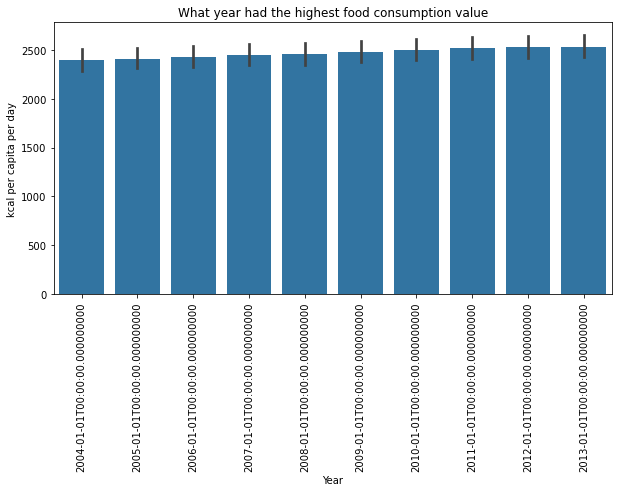

In [46]:
plt.figure(figsize=(10,5))
color = sns.color_palette()[0]
sns.barplot(data = df2, x='Year', y= 'Value',color=color)
plt.title('What year had the highest food consumption value')
plt.ylabel('kcal per capita per day')
plt.xticks(rotation=90)
plt.show()

### 5. Top 3 Food Suppliers in Africa

In [47]:
country_order = df2.groupby(["Country"])["Value"].sum().sort_values(ascending=False)[0:21].index
country_order

Index(['Egypt', 'Tunisia', 'Morocco', 'Algeria', 'Mauritius', 'South Africa',
       'Ghana', 'Cote d'Ivoire', 'Mali', 'Mauritania', 'Gabon', 'Nigeria',
       'Burkina Faso', 'Gambia', 'Lesotho', 'Cabo Verde', 'Benin', 'Guinea',
       'Niger', 'Cameroon', 'Sao Tome and Principe'],
      dtype='object', name='Country')

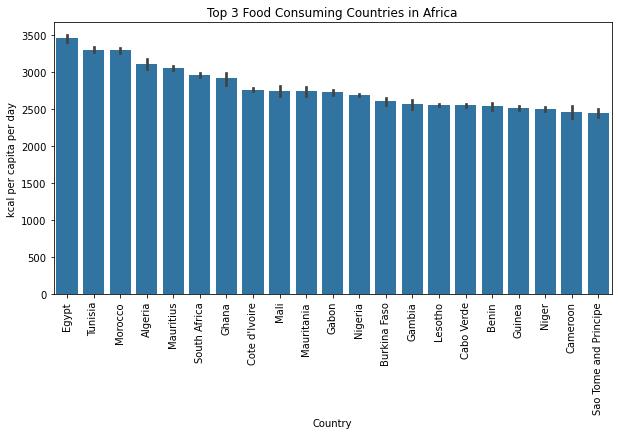

In [48]:
plt.figure(figsize=(10,5))
color = sns.color_palette()[0]
sns.barplot(data = df2, x='Country', y= 'Value',color=color,order=country_order)
plt.title('Top 3 Food Consuming Countries in Africa')
plt.ylabel('kcal per capita per day')
plt.xticks(rotation=90)
plt.show()

This visualisation shows us that **Egypt, Morocco and Tunisia had the highest food supply per capita between 2004 and 2013.**

### Outliers

- Average and median food production, the outliers, Quartile and interquartile ranges.

In [49]:
avg_food_production = df1.Value.mean()
avg_food_production

327.7852012115967

The average food production value is 327.785

In [50]:
median_food_production = df1.Value.median()
median_food_production

18.0

The median food production value is 18.0

In [51]:
avg_food_supply = df2.Value.mean()
avg_food_supply

2469.7755555555555

The average suply value is 2469.776

In [52]:
median_food_supply  = df2.Value.median()
median_food_supply

2376.0

The median supply value is 2376.0

###### Quartiles are part of a set of points called quantiles, which divide the observations in a dataset into equal groups. Quartiles are the three intervals you get when you split the dataset into four equal groups:

- First quartile $(Q_1)$:Splits the lower 25% of the data from the higher 75%.

- Second quartile $(Q_2)$:Splits the dataset in half, and is equal to the median.

- Third quartile$(Q_3)$:Splits the higher 25% of the data from the lower 75%.



In [53]:
Q1_production = df1.Value.quantile(0.25)
Q1_production

3.0

The first quartile $(Q_1)$ of the production value is 3.0

In [54]:
Q2_production = df1.Value.quantile(0.50)
Q2_production

18.0

The second quartile $(Q_2)$ of the production value is 18.0

In [55]:
Q3_production = df1.Value.quantile(0.75)
Q3_production

108.0

The third quartile $(Q_3)$ of the production value is 108.0

The InterquartileRange (IQR) is calculated as

$Q_3 - Q_1$



In [56]:
IQR_production = Q3_production - Q1_production

In [57]:
IQR_production 

105.0

The InterquartileRange (IQR) of the production value is 105.0

In [58]:
Q1_supply = df2.Value.quantile(0.25)
Q1_supply

2174.0

The first quartile $(Q_1)$ of the supply value is 2174.0

In [59]:
Q2_supply = df2.Value.quantile(0.50)
Q2_supply

2376.0

The second quartile $(Q_2)$ of the supply value is 2376.0

In [60]:
Q3_supply = df2.Value.quantile(0.75)
Q3_supply

2681.75

The third quartile $(Q_3)$ of the production value is 2681.75 

In [61]:
IQR_supply = Q3_supply - Q1_supply

In [62]:
IQR_supply

507.75

The InterquartileRange (IQR) of the supply value is 507.75

The InterquartileRange (IQR) is calculated as

$Q_3 - Q_1$

This tells us about the dispersion of the dataset, and helps us to find outliers.

Any value that falls below the lower fence or above the upper fence is considered an outlier.


$Lower fence = Q_1 - 1.5(IQR)$

$Upper fence = Q_3 + 1.5(IQR)$



In [63]:
# Creating a fuction that produces outliers ranges
def outlier(x):
    
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)

    IQR_num = Q3 - Q1
    IQR_mult_num = IQR_num*1.5

    lower_num = Q1 - IQR_mult_num
    upper_num = Q3 + IQR_mult_num
    return lower_num, upper_num

In [64]:
outlier(df1.Value)

(-154.5, 265.5)

In [65]:
outlier(df2.Value)

(1412.375, 3443.375)

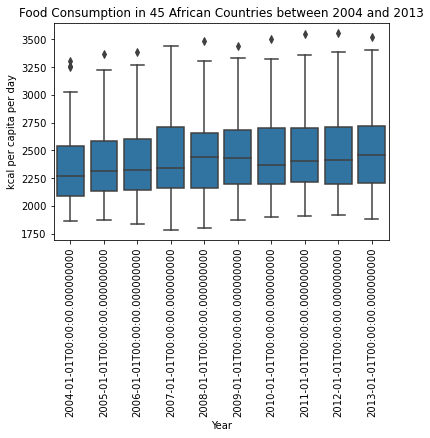

In [66]:
sns.boxplot(x = 'Year', y = 'Value', data = df2 ,color=color)
plt.ylabel('kcal per capita per day')
plt.title('Food Consumption in 45 African Countries between 2004 and 2013')
plt.xticks(rotation = 90);

A boxplot of the food supply data from the previous subsection, for each year.

For each year, the upper and lower fences show the range of values, the black lines show the median value. Outlier values are indicated by the black points.

In [67]:
outlier(df2.Value)

(1412.375, 3443.375)

From this code any value that falls below 1412.375(the lower fence) or above 3443.375(the upper fence) is considered an outlier.

In [68]:
df2.query('Value < 1412.375')

,Country,Year,Value


In [69]:
df2.query('Value > 3443.375')

,Country,Year,Value
123,Egypt,2007-01-01,3445
124,Egypt,2008-01-01,3490
126,Egypt,2010-01-01,3507
127,Egypt,2011-01-01,3549
128,Egypt,2012-01-01,3561
129,Egypt,2013-01-01,3522


Here we can see that various years had an outlier.
From the boxplot above, there was one outlier in 2012 and we are going to analyse the data to find out more.

In [70]:
df2.iloc[128]

Country                  Egypt
Year       2012-01-01 00:00:00
Value                     3561
Name: 128, dtype: object

### Scatter plot showing the outlier.

In [71]:
df_2012 = df2.query('Year == 2012')
df_2012

,Country,Year,Value
8,Algeria,2012-01-01,3272
18,Angola,2012-01-01,2384
28,Benin,2012-01-01,2610
38,Botswana,2012-01-01,2342
48,Burkina Faso,2012-01-01,2707
58,Cabo Verde,2012-01-01,2590
68,Cameroon,2012-01-01,2622
78,Central African Republic,2012-01-01,2116
88,Chad,2012-01-01,2124
98,Congo,2012-01-01,2158


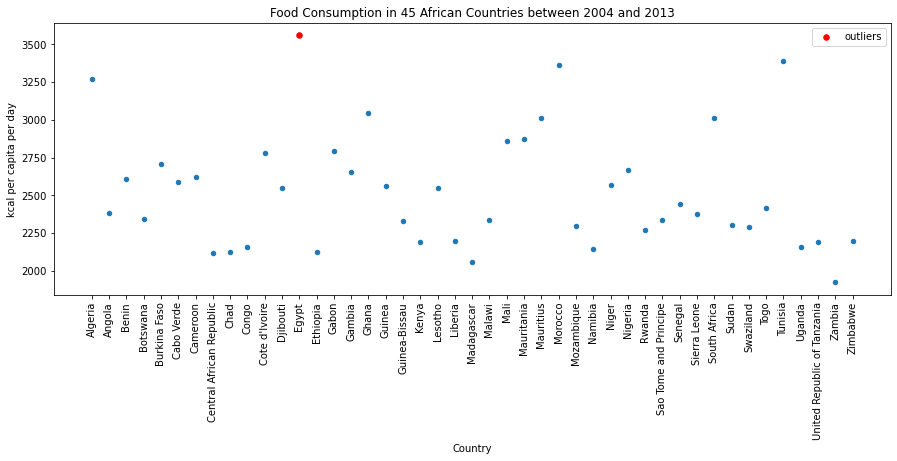

In [72]:
outlier = df_2012[df_2012.Value.gt(3443.375)]
ax = df_2012.plot(kind='scatter', x='Country',y='Value', marker='o', figsize=(15, 5), zorder=0)
outlier.plot(kind='scatter',x='Country',y='Value',color='red',ax=ax, s=30, label='outliers')
plt.ylabel('kcal per capita per day')
plt.title('Food Consumption in 45 African Countries between 2004 and 2013')
plt.xticks(rotation=90)
plt.show()

The scatterplot above attempts to show outliers. The outlier is indicated with the red point and tells us that in 2012 Egypt had slightly higher consumption value than other countries.

#### A comparison between average food consumption and production for each year.

In [73]:
avg_food_production_each_year = df1.groupby(['Country','Year']).sum()
avg_food_production_each_year

Value
Country  Year             
Algeria  2004-01-01  15536
         2005-01-01  15667
         2006-01-01  16417
         2007-01-01  14763
         2008-01-01  13841
...                    ...
Zimbabwe 2009-01-01   5754
         2010-01-01   6777
         2011-01-01   7551
         2012-01-01   8173
         2013-01-01   7914

[450 rows x 1 columns]

In [74]:
avg_food_consumption_each_year = df2.groupby(['Country','Year']).mean()
avg_food_consumption_each_year

Value
Country  Year              
Algeria  2004-01-01  2987.0
         2005-01-01  2958.0
         2006-01-01  3047.0
         2007-01-01  3041.0
         2008-01-01  3048.0
...                     ...
Zimbabwe 2009-01-01  2147.0
         2010-01-01  2168.0
         2011-01-01  2200.0
         2012-01-01  2197.0
         2013-01-01  2110.0

[450 rows x 1 columns]

In [75]:
df1_mean = df1.Value.mean()
df1_mean

327.7852012115967

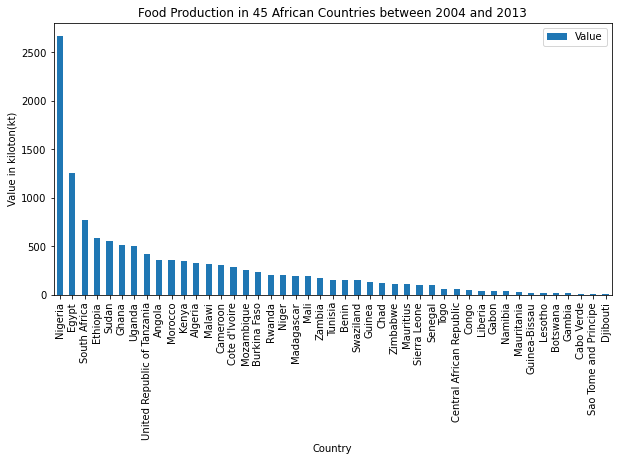

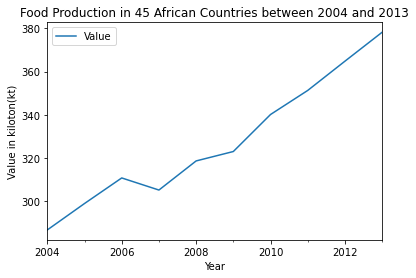

In [76]:
df1.groupby(['Country']).mean().sort_values(by='Value', ascending = False).plot(kind='bar', figsize =(10,5))
plt.ylabel('Value in kiloton(kt)')
plt.title('Food Production in 45 African Countries between 2004 and 2013')
df1.groupby(['Year']).mean().plot()
plt.ylabel('Value in kiloton(kt)')
plt.title('Food Production in 45 African Countries between 2004 and 2013')
plt.show()

Text(0.5, 1.0, 'Food Consumption in 45 African Countries between 2004 and 2013')

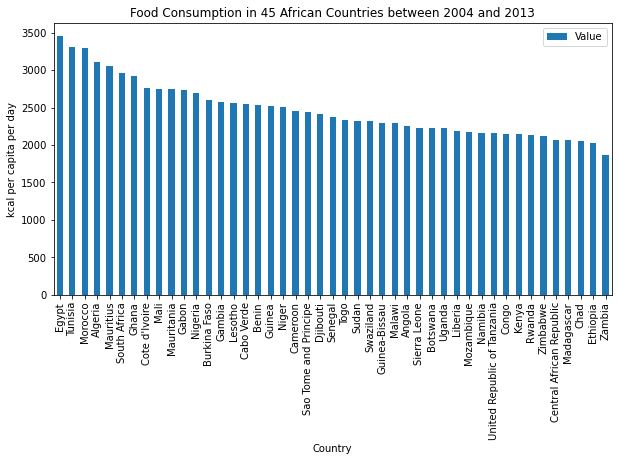

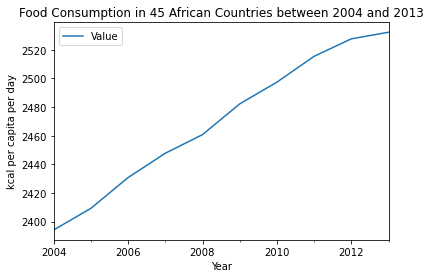

In [77]:
df2.groupby(['Country']).mean().sort_values(by='Value', ascending = False).plot(kind='bar', figsize =(10,5));
plt.ylabel('kcal per capita per day')
plt.title('Food Consumption in 45 African Countries between 2004 and 2013')
df2.groupby(['Year']).mean().plot();
plt.ylabel('kcal per capita per day')
plt.title('Food Consumption in 45 African Countries between 2004 and 2013')

The visualizations above show the average food production and consumption in 45 African Countries side by side. It is seen that although Nigeria, Egypt, and South Africa are the top three food-producing countries in Africa, Egypt, Tunisia and Morocco had the highest food supply value in Africa.

Food production value rose steadily from 2004 to 2006 where it fluctuated till 2009 and rose steadily till 2013. Meanwhile, Food consumption increased steadily.

#### Use and Test of Hypothesis

Given historical figures,"the average production of rice in Mozambique in 2020 will be 13kt"


$\therefore H_0:\mu = 13$

$\therefore H_1:\mu \neq13$

In [78]:
 rice = df1.query('Item =="Rice (Milled Equivalent)"')
rice

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004-01-01,0
11,Algeria,Rice (Milled Equivalent),2005-01-01,0
12,Algeria,Rice (Milled Equivalent),2006-01-01,0
13,Algeria,Rice (Milled Equivalent),2007-01-01,0
14,Algeria,Rice (Milled Equivalent),2008-01-01,0
...,...,...,...,...
22485,Zimbabwe,Rice (Milled Equivalent),2009-01-01,0
22486,Zimbabwe,Rice (Milled Equivalent),2010-01-01,0
22487,Zimbabwe,Rice (Milled Equivalent),2011-01-01,0
22488,Zimbabwe,Rice (Milled Equivalent),2012-01-01,0


## Conclusions

After analyzing the two datasets various insights were derived:

1. 2013 had the highest food production value

2. Nigeria, Egypt and South Africa were the top 3 food producing nations in Africa.

3. It was also discovered that Milk(excluding butter), Vegetables, Mutton & Goat Meat, Bovine Meat, Offals(edible), Fats, Animals, Raw, and Fruits are the top produced foods in Africa with a count of 450 each.

4. I discovered that the consumption value increased over time

5. I discovered the top 3 food suppliers in Africa Interestingly, although Nigeria, Egypt, and South Africa were the top 3 food-producing countries between 2004 and 2013, the visualization shows us that Egypt, Morocco, and Tunisia had the highest food supply per capita.

6. Comparing the average food production and consumption 